Fitted Mean = 0.5006809659312182


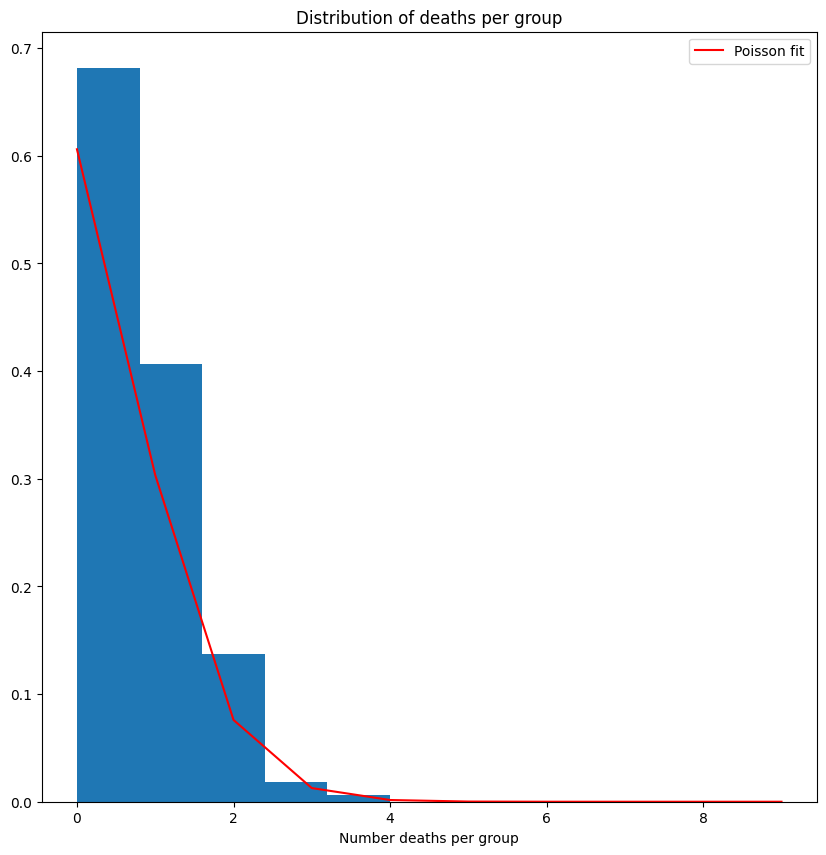

In [68]:
from matplotlib import pyplot as plt
from scipy.stats import poisson
from scipy.optimize import curve_fit

#-----------------------------------------
# Number of deaths per number of groups
number_of_deaths = [0, 1, 2, 3, 4]
number_of_groups = [109, 65, 22, 3, 1]

# Create a list to store the deaths count for each group and fill it with the data
total_deaths = []

for i in range(len(number_of_deaths)):
    for j in range(number_of_groups[i]):
        total_deaths.append(number_of_deaths[i])

# Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(total_deaths, 5, density=True)
ax.set_title("Distribution of deaths per group")
ax.set_xlabel("Number deaths per group")

hist_bar_heights = [bar.get_height() for bar in ax.patches] # Save the heights of the bars

# Define Poisson distribution function
def poisson_fit_function(k, mu):
    return poisson.pmf(k, mu)

# Fit the function and save the results
parameters, cov_matrix = curve_fit(poisson_fit_function, number_of_deaths, hist_bar_heights)

print("Fitted Mean = " + str(parameters[0]))

# Plot the fitted function
x = [n for n in range(10)]
p_x = poisson_fit_function(x, parameters)
ax.plot(x, p_x, 'r', label = "Poisson fit")
ax.legend()

plt.show()